Convolutional Neural Network (CNN) tutorial on Kaggle

In [2]:
# Here's several helpful packages to load in.

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
print(os.listdir("D:\LearnPython\exercise-practice\data"))

['sample_submission.csv', 'test.csv', 'train.csv']


In [3]:
# Loading the dâtaset
train = pd.read_csv("D:/LearnPython/exercise-practice/data/train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# read the test data
test = pd.read_csv("D:/LearnPython/exercise-practice/data/test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# put labels into y_train variable
y_train = train["label"]
# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

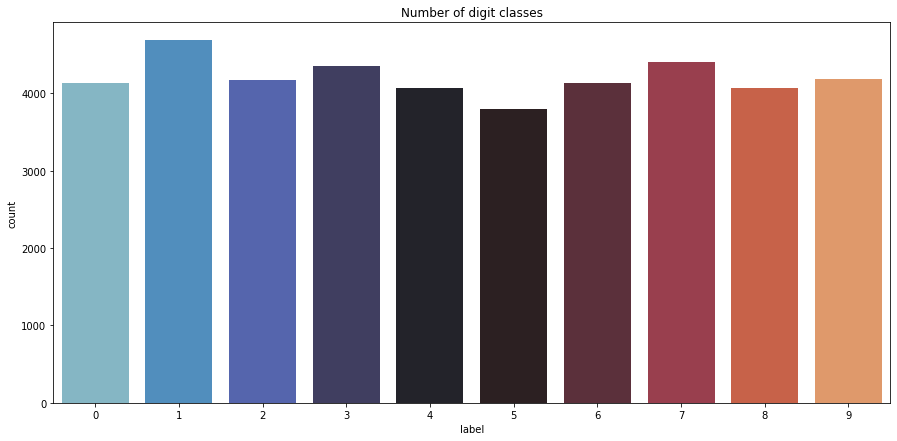

In [6]:
# visulize number of digits classes
plt.figure(figsize=(15,7))
g = sns.countplot(y_train, palette="icefire")
plt.title("Number of digit classes")
y_train.value_counts()

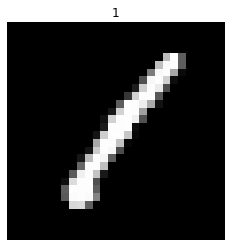

In [7]:
# plot some samples
img = X_train.iloc[0].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

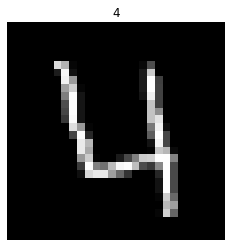

In [8]:
# plot some samples
img = X_train.iloc[3].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[3,0])
plt.axis("off")
plt.show()

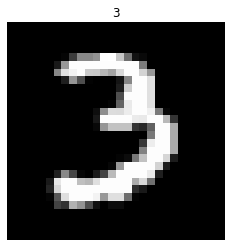

In [9]:
# plot some samples
img = X_train.iloc[9].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[9,0])
plt.axis("off")
plt.show()

In [10]:
# Normalization, Reshape and Label Encoding
""" * Normalization:
Perform a grayscale normalization
CNN will work faster
* Reshape:
Train and test images (28 x 28)
Reshape all data to 28x28x1 3D matrices
One channel
* Label Encoding:
Encode labels to one hot vectors
2 => [0,0,1,0,0,0,0,0,0,0]
4 => [0,0,0,0,1,0,0,0,0,0]"""

' * Normalization:\nPerform a grayscale normalization\nCNN will work faster\n* Reshape:\nTrain and test images (28 x 28)\nReshape all data to 28x28x1 3D matrices\nOne channel\n* Label Encoding:\nEncode labels to one hot vectors\n2 => [0,0,1,0,0,0,0,0,0,0]\n4 => [0,0,0,0,1,0,0,0,0,0]'

In [11]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [12]:
# Reshpe 
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [13]:
# Label Encoding
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
y_train = to_categorical(y_train, num_classes = 10)

In [14]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=2)
print("x_train shape", X_train.shape)
print("x_test shape", X_val.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


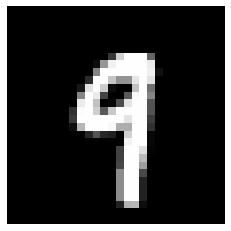

In [16]:
# Some examples
plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.axis("off")
plt.show()

In [18]:
# Convolutional Neural Network
# CNN is used for image classification, object detection, image segmentation, image captioning, etc.

from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator 
from keras.callbacks import ReduceLROnPlateau # learning rate scheduler

model = Sequential()
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# Dropout is a regularization method, a simple way to prevent neural networks from overfitting.
# Fully connected layer
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [19]:
# Define the optimizer 
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [20]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy"
              , metrics=["accuracy"])

In [21]:
# Epochs and Batch Size
epochs = 10  # for better result increase the epochs
batch_size = 250

In [22]:
# Data Augmentation
# To avoid overfitting problem, we need to expand artificially our handwritten digit dataset.
# Alter the training data with small transformations to reproduce the variations occuring when someone is writing a digit.
# For example, the number is not centered The scale is not the same (some who write with big/small numbers) The image is rotated...
# We can generate new handwritten images from the original set of images.
# This way, we can increase the number of training examples and create a better model.
# The goal is the same with other data augmentation techniques like PCA or random crops.

In [23]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=5,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [24]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val, y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
151/151 - 11s - loss: 0.9911 - accuracy: 0.6784 - val_loss: 0.2366 - val_accuracy: 0.9319 - 11s/epoch - 71ms/step
Epoch 2/10
151/151 - 9s - loss: 0.4409 - accuracy: 0.8622 - val_loss: 0.1429 - val_accuracy: 0.9571 - 9s/epoch - 61ms/step
Epoch 3/10
151/151 - 9s - loss: 0.3220 - accuracy: 0.8999 - val_loss: 0.1138 - val_accuracy: 0.9679 - 9s/epoch - 60ms/step
Epoch 4/10
151/151 - 9s - loss: 0.2613 - accuracy: 0.9193 - val_loss: 0.0955 - val_accuracy: 0.9738 - 9s/epoch - 59ms/step
Epoch 5/10
151/151 - 9s - loss: 0.2274 - accuracy: 0.9300 - val_loss: 0.0824 - val_accuracy: 0.9748 - 9s/epoch - 62ms/step
Epoch 6/10
151/151 - 9s - loss: 0.2071 - accuracy: 0.9371 - val_loss: 0.0728 - val_accuracy: 0.9790 - 9s/epoch - 61ms/step
Epoch 7/10
151/151 - 9s - loss: 0.1927 - accuracy: 0.9398 - val_loss: 0.0693 - val_accuracy: 0.9774 - 9s/epoch - 62ms/step
Epoch 8/10
151/151 - 9s - loss: 0.1776 - accuracy: 0.9448 - val_loss: 0.0670 - val_accuracy: 0.9798 - 9s/epoch - 62ms/step
Epoch 9/10
151

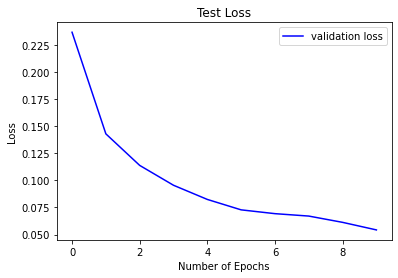

In [25]:
# Evaluate the model
# Test Loss visualization
# Confusion Matrix

# Plot the loss and accuracy curves for training and validation
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()